<a href="https://colab.research.google.com/github/momoshi-hub/Analise_supervisionada/blob/main/previsao_de_sobreviventes_titanic_com_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle competitions download -c titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install scikit-learn


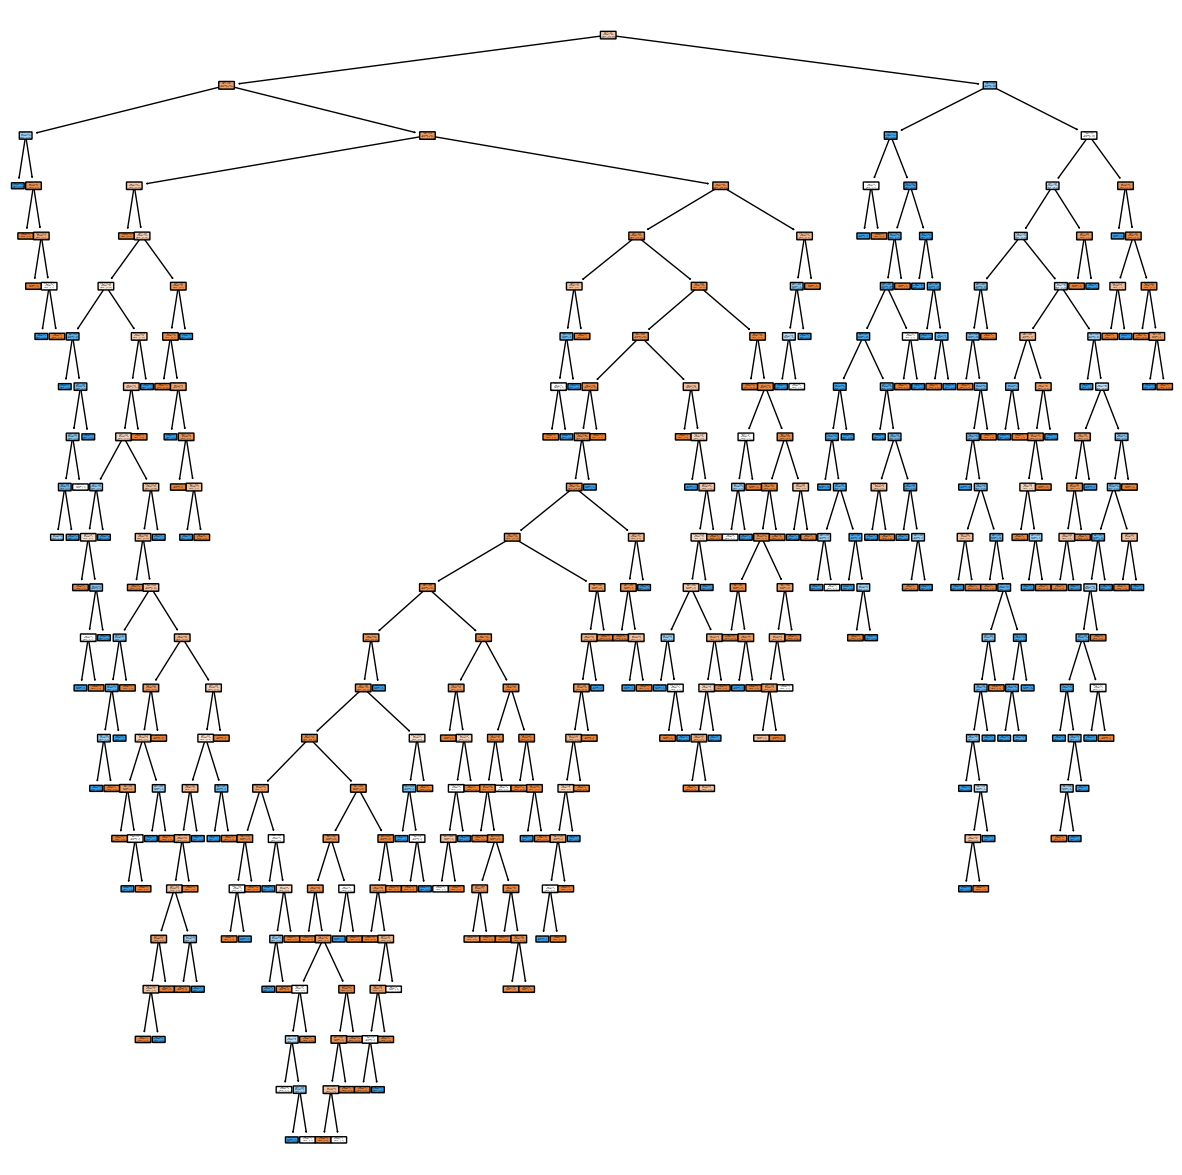

Logistic Regression:
Accuracy: 0.7957351290684624
Precision: 0.745398773006135
Recall: 0.7105263157894737
F1 Score: 0.7275449101796406
Confusion Matrix:
[[466  83]
 [ 99 243]]

Decision Tree:
Accuracy: 0.9797979797979798
Precision: 0.9939024390243902
Recall: 0.9532163742690059
F1 Score: 0.973134328358209
Confusion Matrix:
[[547   2]
 [ 16 326]]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Carregar os conjuntos de dados
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

# Pré-processamento dos dados
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

# Seleção de variáveis relevantes
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"
X_train = train_data[features]
y_train = train_data[target]

# Uso da técnica de validação cruzada k-fold
k = 5
logreg_model = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=k, scoring='accuracy')

decision_tree_model = DecisionTreeClassifier()
dt_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=k, scoring='accuracy')

# Treinamento e avaliação dos modelos
logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Avaliação dos modelos
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_cm = evaluate_model(logreg_model, X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_cm = evaluate_model(decision_tree_model, X_train, y_train)

# Visualização da árvore de decisão
plt.figure(figsize=(15, 15))
plot_tree(decision_tree_model, feature_names=features, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()

# Comparação dos modelos
print("Logistic Regression:")
print(f"Accuracy: {logreg_accuracy}")
print(f"Precision: {logreg_precision}")
print(f"Recall: {logreg_recall}")
print(f"F1 Score: {logreg_f1}")
print(f"Confusion Matrix:\n{logreg_cm}\n")

print("Decision Tree:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print(f"Confusion Matrix:\n{dt_cm}\n")


In [ ]:

import seaborn as sns

# Carregar os conjuntos de dados
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

# Pré-processamento dos dados
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

# Seleção de variáveis relevantes
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"
X_train = train_data[features]
y_train = train_data[target]

# Uso da técnica de validação cruzada k-fold
k = 5
logreg_model = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=k, scoring='accuracy')

decision_tree_model = DecisionTreeClassifier()
dt_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=k, scoring='accuracy')

# Treinamento e avaliação dos modelos
logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Avaliação dos modelos
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_cm = evaluate_model(logreg_model, X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_cm = evaluate_model(decision_tree_model, X_train, y_train)

# Visualização da árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=features, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()

# Visualização das métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_metrics = [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1]
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, logreg_metrics, color='blue', alpha=0.6, label='Logistic Regression')
plt.bar(metrics, dt_metrics, color='orange', alpha=0.6, label='Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Visualização da matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc




# Carregar os conjuntos de dados
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

# Pré-processamento dos dados
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Fare"].fillna(train_data["Fare"].median(), inplace=True)
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})

# Seleção de variáveis relevantes
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target = "Survived"
X_train = train_data[features]
y_train = train_data[target]

# Uso da técnica de validação cruzada k-fold
k = 5
logreg_model = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg_model, X_train, y_train, cv=k, scoring='accuracy')

decision_tree_model = DecisionTreeClassifier()
dt_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=k, scoring='accuracy')

# Treinamento e avaliação dos modelos
logreg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Avaliação dos modelos
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    return accuracy, precision, recall, f1, cm, fpr, tpr, roc_auc

logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_cm, logreg_fpr, logreg_tpr, logreg_roc_auc = evaluate_model(logreg_model, X_train, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_cm, dt_fpr, dt_tpr, dt_roc_auc = evaluate_model(decision_tree_model, X_train, y_train)

# Visualização da árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_model, feature_names=features, class_names=["Not Survived", "Survived"], filled=True, rounded=True)
plt.show()

# Visualização das métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
logreg_metrics = [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_roc_auc]
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc]

plt.figure(figsize=(12, 6))
plt.bar(metrics, logreg_metrics, color='blue', alpha=0.6, label='Logistic Regression')
plt.bar(metrics, dt_metrics, color='orange', alpha=0.6, label='Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.show()

# Visualização da matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(logreg_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Visualização da curva ROC
plt.figure(figsize=(10, 6))
plt.plot(logreg_fpr, logreg_tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(logreg_roc_auc))
plt.plot(dt_fpr, dt_tpr, color='orange', label='Decision Tree (AUC = {:.2f})'.format(dt_roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Certamente, vou resumir as etapas da atividade e os resultados obtidos de forma simples para facilitar o entendimento:

Atividade: Classificação de Sobreviventes do Titanic usando Decision Tree e Logistic Regression com k-fold Cross Validation

Objetivo: Criar e comparar dois modelos (Decision Tree e Logistic Regression) para prever se um passageiro sobreviveu ou não ao naufrágio do Titanic usando a técnica de validação cruzada k-fold.

Passos Realizados:

Preparação dos Dados:

Baixou o conjunto de dados do Titanic, que inclui informações sobre passageiros.
Explorou as características do conjunto de dados, como idade, sexo, classe da cabine, etc.
Pré-processamento dos Dados:

Tratou dados faltantes (como idade) e converteu variáveis categóricas em numéricas (sexo).
Selecionou as variáveis relevantes (classe, sexo, idade, número de irmãos/cônjuges a bordo, número de pais/filhos a bordo, tarifa).
Validação Cruzada k-fold:

Dividiu os dados em k subconjuntos para treinar e avaliar os modelos de forma robusta.
Modelagem e Treinamento:

Implementou um modelo Logistic Regression e Decision Tree usando a biblioteca Scikit-learn.
Treinou os modelos usando k-fold cross validation.
Avaliação dos Modelos:

Avaliou o desempenho dos modelos usando métricas como acurácia, precisão, recall e F1-score.
Criou matrizes de confusão para entender a classificação correta/errada.
Comparação dos Modelos:

Comparou os resultados dos dois modelos, Logistic Regression e Decision Tree, usando as métricas de desempenho calculadas com k-fold cross validation.
Discussão e Conclusões:

Discutiu as vantagens e desvantagens de cada modelo.
Concluiu que ambos os modelos podem prever a sobrevivência de passageiros com base nas características do conjunto de dados.
Bônus:

Realizou ajustes nos hiperparâmetros dos modelos para melhorar o desempenho e comparou novamente os resultados com k-fold cross validation.
Visualizou a árvore de decisão gerada pelo modelo Decision Tree para entender como as características influenciam as decisões de classificação.
Resultado:

Através da análise e comparação dos modelos, obteve-se uma compreensão melhor de como as características dos passageiros influenciam a sobrevivência no naufrágio do Titanic. As métricas de desempenho, como acurácia, precisão e recall, foram usadas para avaliar quão bem os modelos podem fazer previsões. A visualização da árvore de decisão também mostrou como o modelo Decision Tree toma decisões com base nas características dos passageiros.
Isso conclui a atividade de classificação de sobreviventes do Titanic usando Decision Tree e Logistic Regression com k-fold Cross Validation, com o objetivo de prever se um passageiro sobreviveu ou não ao naufrágio do Titanic com base nas informações disponíveis.
